# Final Project - Forecasting mutual funds yield in Israel

## Descriptive statistics

Group number: 48

Aviv Yefet  208495267

Chanan Jacobs  316090877

Odeya Rachamim 203660709

### Import 

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

### Load dataset

In [3]:
# Importing the datasets
Data1 = pd.read_csv('hodshi_012019.csv',encoding='UTF-8')
Data2 = pd.read_csv('hodshi_022019.csv',encoding='UTF-8')
Data3 = pd.read_csv('hodshi_032019.csv',encoding='UTF-8')
Data4 = pd.read_csv('hodshi_042019.csv',encoding='UTF-8')
Data5 = pd.read_csv('hodshi_052019.csv',encoding='UTF-8')
Data6 = pd.read_csv('hodshi_062019.csv',encoding='UTF-8')
Data7 = pd.read_csv('hodshi_072019.csv',encoding='UTF-8')
Data8 = pd.read_csv('hodshi_082019.csv',encoding='UTF-8')
Data9 = pd.read_csv('hodshi_092019.csv',encoding='UTF-8')
Data10 = pd.read_csv('hodshi_102019.csv',encoding='UTF-8')
Data11 = pd.read_csv('hodshi_112019.csv',encoding='UTF-8')
Data12 = pd.read_csv('hodshi_122019.csv',encoding='UTF-8')

In [6]:
# Consolidate the files into one data set

Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12], axis=0)
dict = {'MISPAR MENAHE':'Mannager_Number',
        'MISPAR KEREN':'Fund_Number',
        'SHEM KEREN':'Fund_Name',
        'PTUCHA/SGURA':'Fund_Type',
        'SHEM NECHES':'Asset_name',
        'MISPAR NIYAR':'Security_Num',
        'MISPAR MEZAHE':'Identity_Num',
        'SUG MISPAR MEZAHE':'Identity_Num_Type',
        'TEUR SUG MISPAR MEZAHE':'Identity_Num_Type_Describe',    
        'KAMUT':'Amount',
        'SHOVI':'Value',
        'MECHIR':'Price',
        'SHOVI MATBEA':'Currency_Value',
        'ACHUZ MIKEREN':'Precent_From_Fund',
        'KAMUT HASHALA':'lending_Ammount',
        'SUG MECHIR':'Price_Type',
        'MAKOM MISCHAR':'Country_of_trade',
        'SHUK MISCHAR':'Trading_Market', 
        'MATBEA':'Currency',
        'SHAAR MATBEA':'Currency_Rate',
        'KAMUT LEPIDION':'Redemption_Amount',
        'RIBIT ZVURA':'Accumalted_Intrest',
        'TICKER':'TICKER',
        'HITCHAYVUT':'Commitment',
        'DARGAT AGACH':'Degree_of_Bond',
        'KOD CHEVRA MEDAREGET':'Tiering_company_code',
        'KOD BANK':'Bank_code',
        'TAARICH DIVUCAH':'Report_Date',
        'MISPAR RESHUMA BATOFES':'Num_of_record_in_form',
        'MISPAR RESHUMUT':'Num_of_records',
        'MISPAR ASMACHTA':'Num_of_reference'}

Data.rename(columns=dict,inplace=True)

Data["Report_Date"] = pd.to_datetime(Data["Report_Date"]) # Converting 'Report_Date' column into datetime type

list_data=[Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]

for curr_data in list_data:
    curr_data.rename(columns=dict,inplace=True)  
    curr_data["Report_Date"] = pd.to_datetime(curr_data["Report_Date"])

### Description of the data set

In [39]:
Data

,Mannager_Number,Fund_Number,Fund_Name,Fund_Type,Asset_name,Security_Num,Identity_Num,Identity_Num_Type,Identity_Num_Type_Describe,Amount,...,Accumalted_Intrest,TICKER,Commitment,Degree_of_Bond,Tiering_company_code,Bank_code,Report_Date,Num_of_record_in_form,Num_of_records,Num_of_reference
0,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,טיב טעם הולדינגס 0.25שח ...,103010,1,1,"מס' בורסה ת""א",32945.0,...,0.0,TTAM,1,,0,31,2019-01-31,1,4717,2019-03-014685
1,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,ביטפארמס טכנו מר 0.01שח ...,1080241,1,1,"מס' בורסה ת""א",3243.0,...,0.0,BLLCF,1,,0,31,2019-01-31,2,4717,2019-03-014685
2,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,המלט 1 ...,1080324,1,1,"מס' בורסה ת""א",427.0,...,0.0,HAML,1,,0,31,2019-01-31,3,4717,2019-03-014685
3,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,רימוני מר 1 ...,1080456,1,1,"מס' בורסה ת""א",1059.0,...,0.0,RIMO,1,,0,31,2019-01-31,4,4717,2019-03-014685
4,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,אנליסט מ''ר 1 ...,1080613,1,1,"מס' בורסה ת""א",637.0,...,0.0,ANLT,1,,0,31,2019-01-31,5,4717,2019-03-014685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291332,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,סך חודשי דמי שאילה ...,,329,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43476,43480,2020-03-005743
291333,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,הפסד הון תיאורטי נצבר ליום המסחר האחרון ...,,330,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43477,43480,2020-03-005743
291334,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,דמי ניהול משתנים מיום הבסיס ...,,331,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43478,43480,2020-03-005743
291335,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,חשיפה לסיכון אשראי - צד שלישי ...,,332,0,,0.0,...,0.0,,0,,0,0,2019-12-31,43479,43480,2020-03-005743


In [40]:
# Data[['Mannager_Number','Fund_Number','Fund_Name','Fund_Type','Asset_name','Security_Num','Identity_Num','Amount','Value','Price','Report_Date']]

In [41]:
Data[['Fund_Number','Fund_Type','Asset_name','Security_Num','Identity_Num','Amount','Value','Price','Report_Date']].head(16)

,Fund_Number,Fund_Type,Asset_name,Security_Num,Identity_Num,Amount,Value,Price,Report_Date
0,5100946,פתוחה רגילה,טיב טעם הולדינגס 0.25שח ...,103010,1,32945.0,75016,227.7,2019-01-31
1,5100946,פתוחה רגילה,ביטפארמס טכנו מר 0.01שח ...,1080241,1,3243.0,4239,130.7,2019-01-31
2,5100946,פתוחה רגילה,המלט 1 ...,1080324,1,427.0,31965,7486.0,2019-01-31
3,5100946,פתוחה רגילה,רימוני מר 1 ...,1080456,1,1059.0,66283,6259.0,2019-01-31
4,5100946,פתוחה רגילה,אנליסט מ''ר 1 ...,1080613,1,637.0,12116,1902.0,2019-01-31
5,5100946,פתוחה רגילה,אילקס מדיקל מר 1 ...,1080753,1,927.0,51087,5511.0,2019-01-31
6,5100946,פתוחה רגילה,שניב 1 ...,1080837,1,3406.0,11509,337.9,2019-01-31
7,5100946,פתוחה רגילה,אינטר תעשיות מניה ...,1080928,1,807.0,3811,472.3,2019-01-31
8,5100946,פתוחה רגילה,איסתא 1ש''ח ...,1081074,1,971.0,54405,5603.0,2019-01-31
9,5100946,פתוחה רגילה,אלביט מערכות ...,1081124,1,196.0,88043,44920.0,2019-01-31


In [42]:
Data['Fund_Number'].unique().shape

(2275,)

In [43]:
Data.shape

(3311487, 31)

In [44]:
# Dataset columns

Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311487 entries, 0 to 291336
Data columns (total 31 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Mannager_Number             int64         
 1   Fund_Number                 int64         
 2   Fund_Name                   object        
 3   Fund_Type                   object        
 4   Asset_name                  object        
 5   Security_Num                object        
 6   Identity_Num                int64         
 7   Identity_Num_Type           int64         
 8   Identity_Num_Type_Describe  object        
 9   Amount                      float64       
 10  Value                       int64         
 11  Price                       float64       
 12  Currency_Value              float64       
 13  Precent_From_Fund           float64       
 14  lending_Ammount             object        
 15  Price_Type                  int64         
 16  Country_of_trade   

In [45]:
Data.isnull().sum()

Mannager_Number                   0
Fund_Number                       0
Fund_Name                         0
Fund_Type                     47586
Asset_name                        0
Security_Num                      0
Identity_Num                      0
Identity_Num_Type                 0
Identity_Num_Type_Describe        0
Amount                            0
Value                             0
Price                             0
Currency_Value                    0
Precent_From_Fund                 0
lending_Ammount                   0
Price_Type                        0
Country_of_trade                  0
Trading_Market                    0
Currency                          0
Currency_Rate                     0
Redemption_Amount                 0
Accumalted_Intrest                0
TICKER                            0
Commitment                        0
Degree_of_Bond                    0
Tiering_company_code              0
Bank_code                         0
Report_Date                 

### Number of funds thruought months in 2019

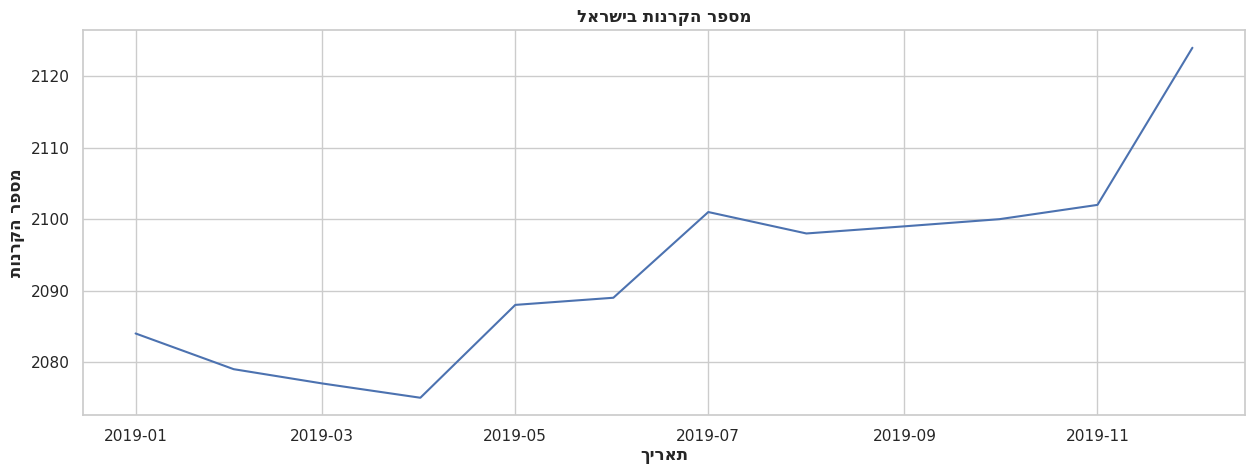

In [46]:
list_data = [Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]
num_of_funds = []
type_name = []
months = ['1/2019','2/2019','3/2019','4/2019','5/2019','6/2019','7/2019','8/2019','9/2019','10/2019','11/2019','12/2019']
count = 0

import matplotlib.font_manager as fm

# Set Hebrew font
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.sans-serif"] = ["Microsoft Sans Serif"]

for data_set in list_data:
    data_set = data_set[data_set['Fund_Type']!='`']
    month_types = (data_set[['Fund_Number','Fund_Type']].drop_duplicates())
    month_types = month_types.groupby(['Fund_Type'])['Fund_Number'].count().reset_index(name='count funds')
    month_types = month_types.values.tolist()
    curr_Month = months[count]
    month_types[0].append(curr_Month)
    type_name.append(month_types[0])    
    month_types[1].append(curr_Month)
    type_name.append(month_types[1])
    month_types[2].append(curr_Month)
    type_name.append(month_types[2])
    month_types[3].append(curr_Month)
    type_name.append(month_types[3])
    count+=1
    #count toatal number of funds thruought months in 2019:
    num = data_set["Fund_Number"].unique().size
    num_of_funds.append(num)
#df contains number of funds of specific type  each month
df = []
df.append(months)
df.append(num_of_funds)
df = pd.DataFrame(df).transpose()
df.columns=['month', 'number_of_funds']

df = df.set_index('month')
df.index = pd.to_datetime(df.index)

type_name = pd.DataFrame(type_name, columns = ['type', 'Number','month'])
type_name = swap_columns(type_name, 'month' , 'type')
type_name = swap_columns(type_name, 'Number' , 'type')
type_name = type_name.set_index('month')
xlabel="תאריך"
ylabel="מספר הקרנות"
title="מספר הקרנות בישראל"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]


# plot the graph:
plt.figure(figsize=(15, 5))
plt.xlabel(xlabel, fontweight ='bold')
plt.ylabel(ylabel, fontweight ='bold')
plt.title(title, fontweight ='bold')
plt.plot(df)
plt.show()

## Dataset features description 

### Fund managers

In [47]:
Data.dropna(subset=['Mannager_Number'])['Mannager_Number'].unique()

array([511576209, 513534974, 511146490, 511756595, 513011445, 512958471,
       510938608, 511303661, 512222324, 511944670, 510791031, 512887647,
       510918741, 513846808, 513865626, 513765339, 515430999, 512536608,
       511776783, 514884485, 510954498], dtype=int64)

In [48]:
# Number of fund managers in 2019
len(Data.dropna(subset=['Mannager_Number'])['Mannager_Number'].unique())

21

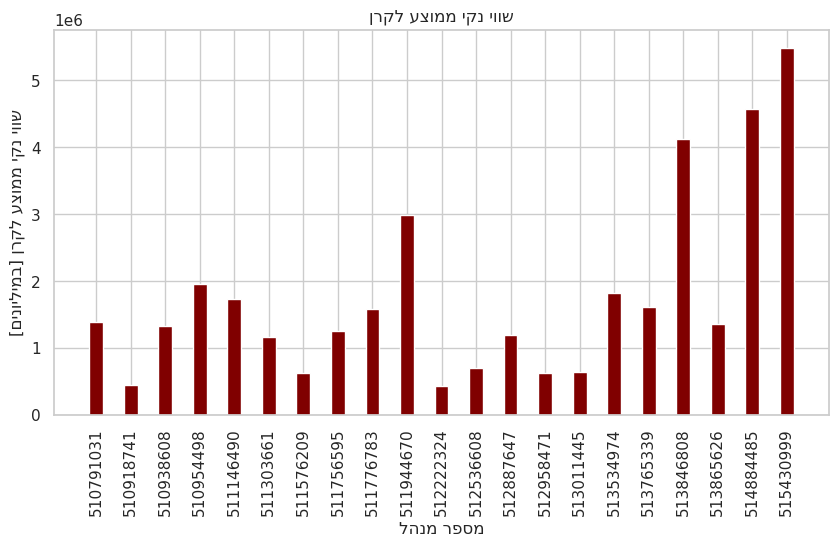

In [49]:
# Average net value of the fund assets of the fund managers

df_mannager = Data[['Mannager_Number','Fund_Number', 'Value','Fund_Type','Identity_Num']]

value = [300] # 'Identity_Num' with index of 300 represent the net value of the fund's assets (Net Asset Value)         

NAV_df = df_mannager[df_mannager['Identity_Num'].isin(value)]

# Calculation of average net asset value per fund manager
averageNAV = NAV_df.groupby(['Mannager_Number'])['Value'].mean().reset_index(name='Average_mannager_value') 
averageNAV['Average_mannager_value'] = averageNAV['Average_mannager_value'].apply(lambda x: '{:.6f}'.format(x))

mannager = averageNAV['Mannager_Number'].astype(str)
value = averageNAV['Average_mannager_value'].astype(float)/100 # million

x_pos = np.arange(len(mannager))
    
fig = plt.figure(figsize = (10, 5))

plt.xticks(x_pos, mannager, rotation=90)
 
# creating the bar plot
plt.bar(mannager, value, color ='maroon',
        width = 0.4)
 
xlabel="מספר מנהל"
ylabel="שווי נקי ממוצע לקרן ]במיליונים["
title="שווי נקי ממוצע לקרן"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]

    
    
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.show()


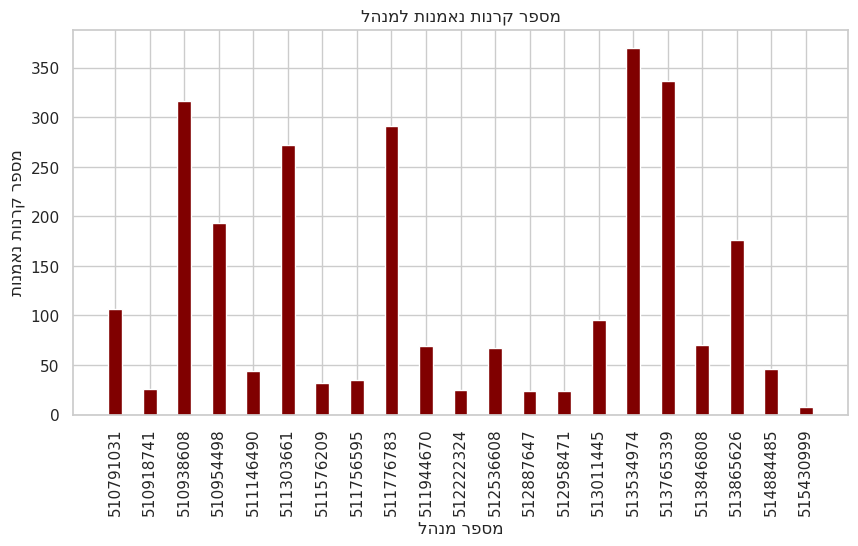

In [50]:
# number of mutual funds managed by a fund manager
#df_mannager = average_fund_assets.groupby(['Average_assets']).mean().reset_index(name='Average_assets')

df_mannager = Data[['Mannager_Number','Fund_Number', 'Value','Fund_Type','Identity_Num']]

# Calculation the number of mutual funds per fund manager
funds_df = df_mannager.groupby(['Mannager_Number'])['Fund_Number'].nunique().to_frame('count')
funds_df.reset_index(inplace = True)

mannager = funds_df['Mannager_Number'].astype(str)
fund = funds_df['count'].astype(int)

x_pos = np.arange(len(mannager))
    
fig = plt.figure(figsize = (10, 5))

plt.xticks(x_pos,mannager, rotation=90)
 
# creating the bar plot
plt.bar(mannager, fund, color ='maroon',
        width = 0.4)

xlabel="מספר מנהל"
ylabel="מספר קרנות נאמנות"
title="מספר קרנות נאמנות למנהל"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.show()

### Fund Type

In [51]:
Data.dropna(subset=['Fund_Type'])['Fund_Type'].unique()

array(['פתוחה רגילה', 'קרן סל - קרן סגורה', 'קרן מחקה - קרן פתוחה',
       'קרן טכנולוגיה עילית - קרן סגורה'], dtype=object)

### Number of mutual funds of each type throughout 2019

            Open_index  open_regular  closed  technologhy_fund
month                                                         
2019-01-01         326          1147     554                 1
2019-02-01         330          1148     544                 1
2019-03-01         334          1146     540                 1
2019-04-01         337          1147     534                 1
2019-05-01         346          1150     535                 1
2019-06-01         348          1150     534                 1
2019-07-01         349          1158     537                 1
2019-08-01         365          1150     540                 1
2019-09-01         370          1154     532                 1
2019-10-01         370          1158     529                 1
2019-11-01         375          1157     527                 1
2019-12-01         384          1186     517                 1


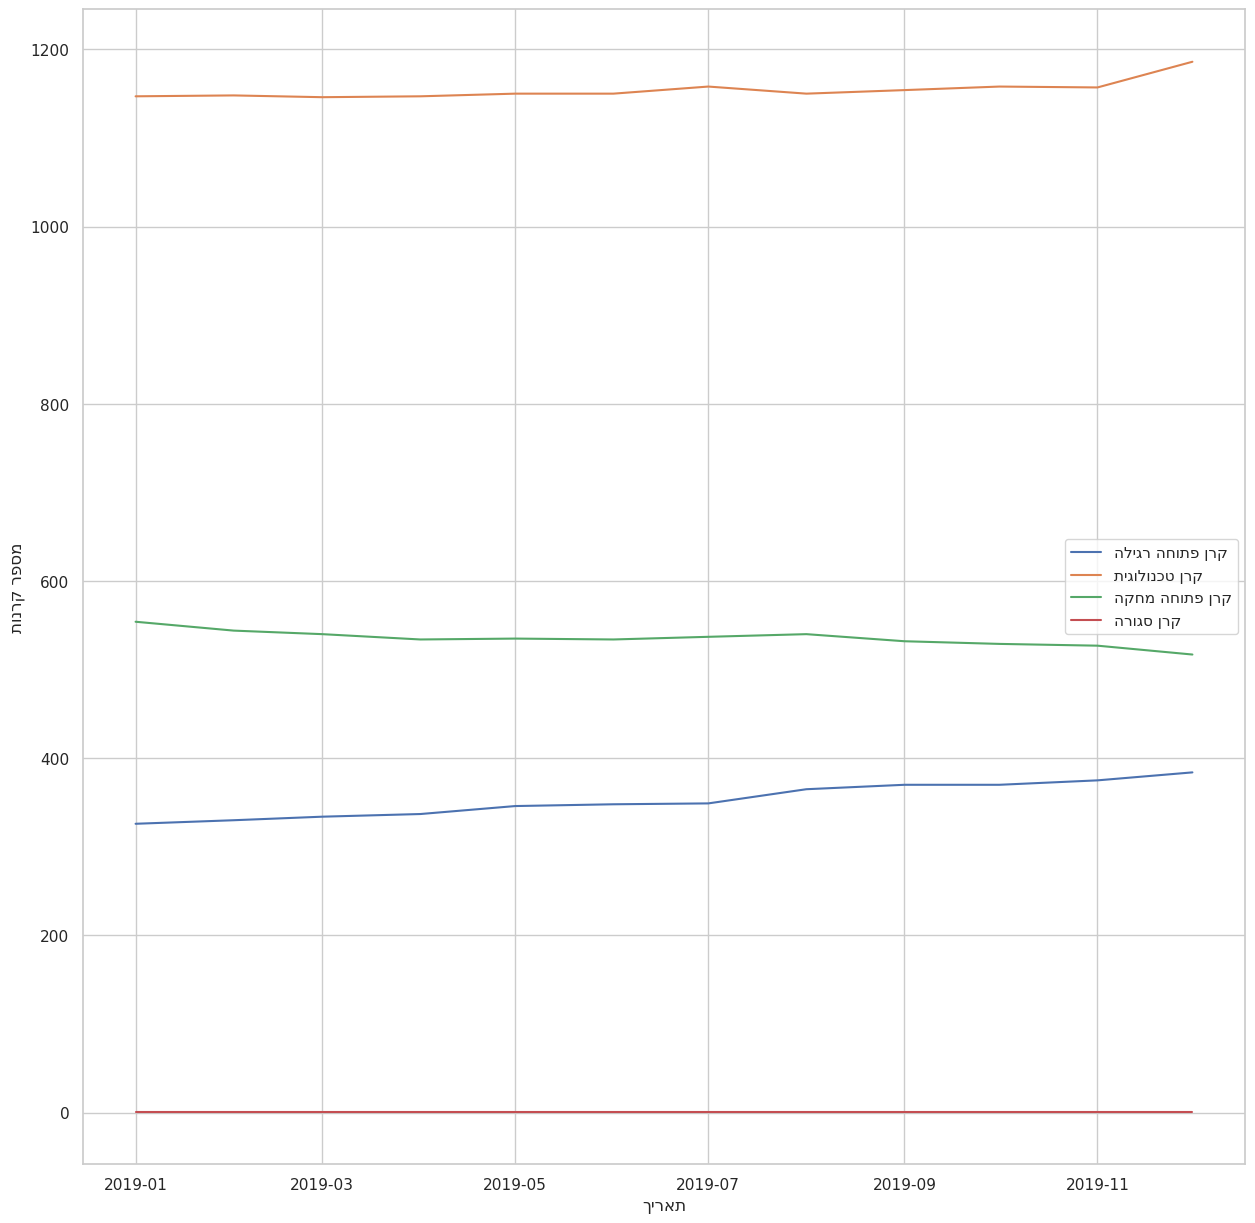

In [52]:

#type_name is a data frame that filterd from the general data only the find type and number of funds per month

 
type_name.index = pd.to_datetime(type_name.index)
closed=type_name.loc[type_name['type']=='קרן סל - קרן סגורה']
open_regular=type_name.loc[type_name['type']=='פתוחה רגילה']
open_index=type_name.loc[type_name['type']=='קרן מחקה - קרן פתוחה']
technologhy_fund=type_name.loc[type_name['type']=='קרן טכנולוגיה עילית - קרן סגורה']

#change headers 
open_index.rename(columns={'Number':'Open_index'}, inplace=True)
open_regular.rename(columns={'Number':'open_regular'}, inplace=True)
closed.rename(columns={'Number':'closed'}, inplace=True)
technologhy_fund.rename(columns={'Number':'technologhy_fund'}, inplace=True)

#merge all columns to one data frame:
list_types=[open_regular,closed,technologhy_fund]
types=open_index
types=types.drop('type',axis=1)
for i in range(len(list_types)):
    curr=list_types[i].drop('type',axis=1)
    types=pd.merge(types,curr,on =['month'],how ="left")

#now for eache type of fund we show the number of funds per month
#we will now plot it:

print(types)
fig = plt.figure(figsize = (15, 15))

xlabel="תאריך"
ylabel="מספר קרנות"
title="מספר קרנות נאמנות למנהל"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]

label = ["קרן פתוחה רגילה", "קרן טכנולוגית", "קרן פתוחה מחקה", "קרן סגורה"]

reversed_label = [item[::-1] for item in label]
plt.plot(types,label=reversed_label)

plt.ylabel(ylabel)
plt.xlabel(xlabel)
#plt.plot(df,label='total funds through year')
plt.legend()  
plt.show()

### Average amount of mutual funds per fund type

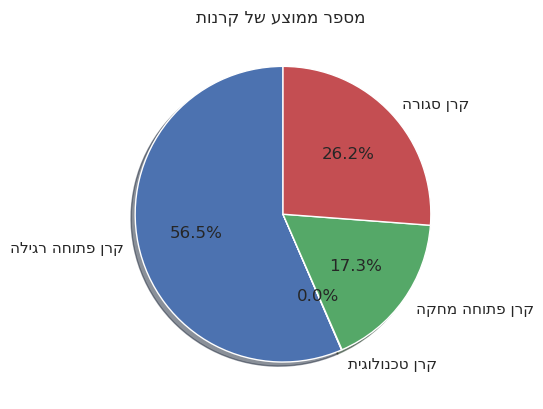

,type,average_amount_funds_type
0,פתוחה רגילה,1154.25
1,קרן טכנולוגיה עילית - קרן סגורה,1.00
2,קרן מחקה - קרן פתוחה,352.83
3,קרן סל - קרן סגורה,535.25


In [53]:
data_pie = type_name.groupby(['type'])['Number'].mean().reset_index(name='average_amount_funds_type')

label = ["קרן פתוחה רגילה", "קרן טכנולוגית", "קרן פתוחה מחקה", "קרן סגורה"]

reversed_label = [item[::-1] for item in label]
plt.pie(data_pie['average_amount_funds_type'], labels =reversed_label,shadow = True,autopct='%1.1f%%',  startangle=90)
header=" מספר ממוצע של קרנות"
header=header[::-1]

head = header
plt.title(head)
plt.show()
data_pie.round(2)

### Yearly yield 

In [22]:
Raw_year_Yield_data = pd.read_csv('year_yield.csv',encoding='UTF-8')

#clean data:
Raw_year_Yield_data = Raw_year_Yield_data[8:]
Raw_year_Yield_data.columns = Raw_year_Yield_data.iloc[0]
Raw_year_Yield_data = Raw_year_Yield_data[1:]
year_yield = Raw_year_Yield_data[["מס' קרן בבורסה", 'תשואה שקלית של הקרן']]
year_yield = year_yield.reset_index(drop = True)    
year_yield = year_yield[:2127]
dict = {"מס' קרן בבורסה":'Fund_Number','תשואה שקלית של הקרן':'Yearly_yield'}
year_yield.rename(columns=dict,inplace=True)
year_yield['Yearly_yield'] = year_yield['Yearly_yield'].astype(float)
year_yield['Fund_Number'] = year_yield['Fund_Number'].astype(int)
year_yield

8,Fund_Number,Yearly_yield
0,5119904,8.46
1,5125232,12.28
2,5125224,41.07
3,5125240,30.98
4,5112628,21.19
...,...,...
2122,5128814,-0.08
2123,5128426,21.14
2124,5130034,-0.75
2125,5123393,9.63


### Show average yield, average value and average amount of assets per mutual fund

In [23]:
df_00 = Data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value','Fund_Type','Security_Num']]
groups = [300,301]
value = [300]
assets_00 = [301]
df_01 = df_00[df_00['Identity_Num'].isin(value)]
df_02 = df_00[df_00['Identity_Num'].isin(assets_00)]


#calculate average fund value in general level
average_fund_value = df_01.groupby(['Fund_Number'])['Value'].mean().reset_index(name='Average_Fund_value')
average_fund_value['Average_value_in_Millions'] = average_fund_value.Average_Fund_value/1000000
average_fund_value = average_fund_value.drop('Average_Fund_value',axis=1)

#calculate average assets number in general level
average_fund_assets = df_00.loc[(df_00['Identity_Num']<100)]
average_fund_assets = average_fund_assets.groupby(['Fund_Number','Report_Date','Fund_Type'])['Security_Num'].count().reset_index(name='unique_securities_in_fund')
average_fund_assets = average_fund_assets.groupby(['Fund_Number','Fund_Type'])['unique_securities_in_fund'].mean().reset_index(name='Average_assets')

#merge average fund value average assets number and yearly yield data in to one datd frame
df_03 = pd.merge(average_fund_value,average_fund_assets,on =['Fund_Number'],how ="inner")
df_03 = pd.merge(df_03,year_yield,on =['Fund_Number'],how ="inner")
df_03 = swap_columns(df_03,'Fund_Type' ,'Average_value_in_Millions')
df_03.describe().drop('Fund_Number',axis=1).round(2)

,Average_value_in_Millions,Average_assets,Yearly_yield
count,2077.00,2077.00,2077.00
mean,158.74,79.17,11.15
std,305.14,78.65,12.74
min,0.06,1.00,-100.00
25%,19.54,18.08,4.25
50%,58.97,54.17,8.35
75%,153.44,118.50,17.16
max,5134.58,498.08,114.75


# Average assets, fund value and average return at the group level

### Average Net Value per fund type

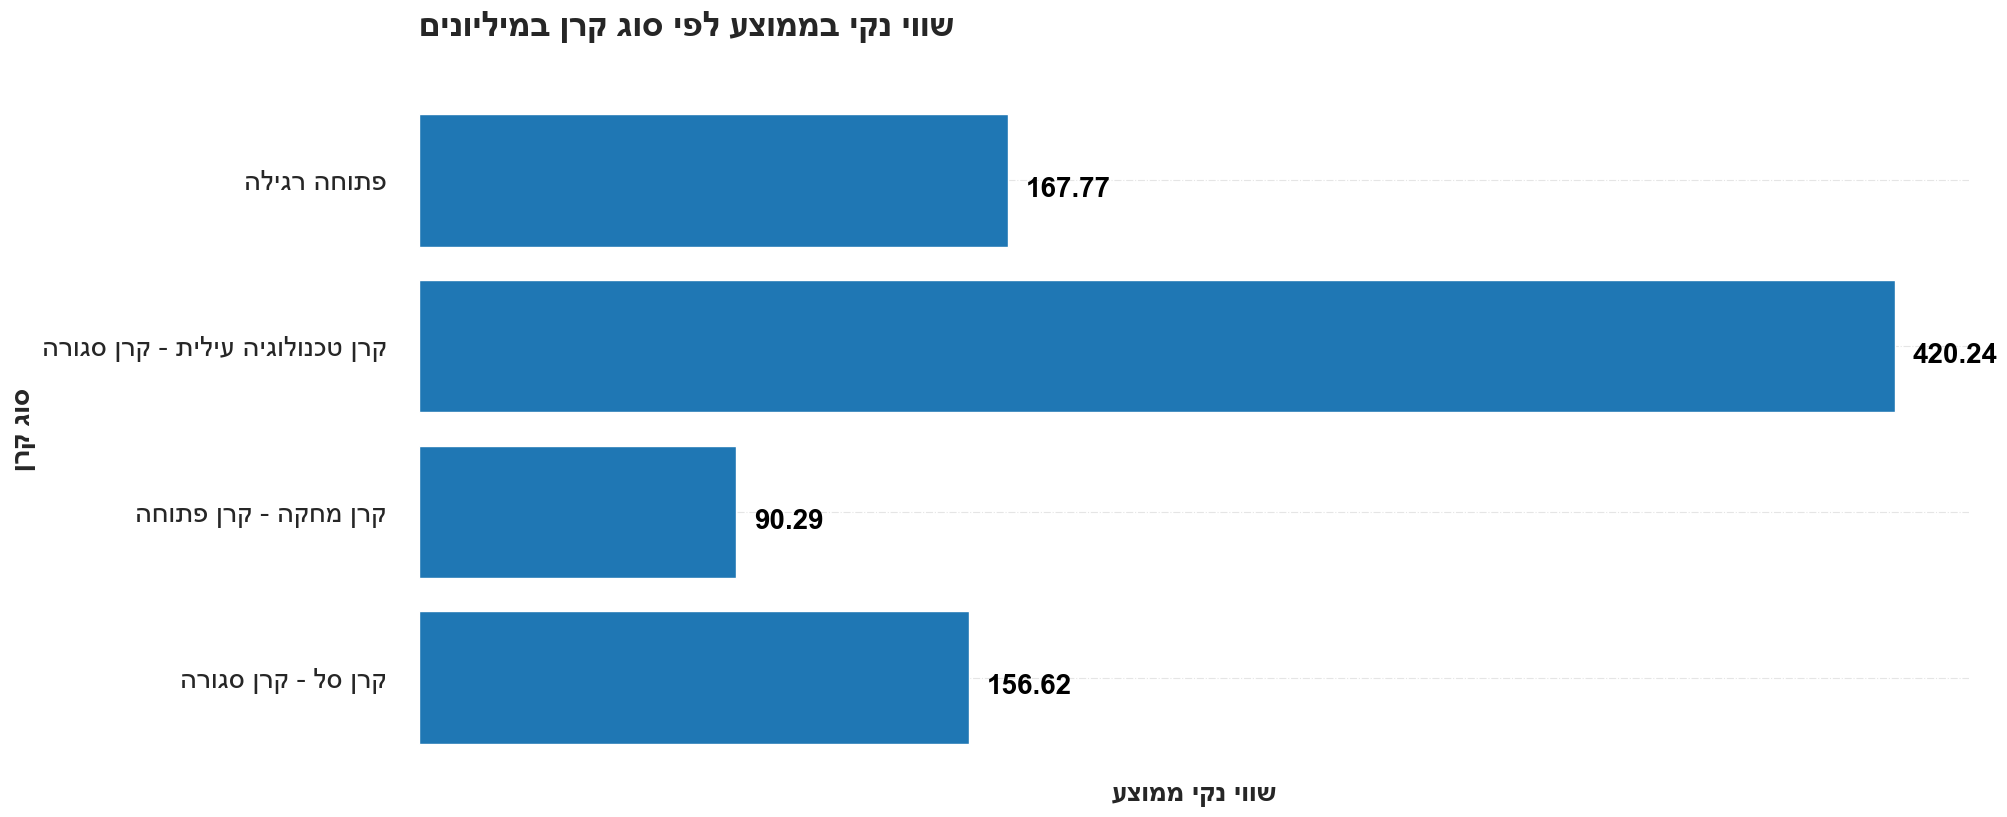

,Fund_Type,Average_value_in_Millions
0,הליגר החותפ,167.769290
1,הרוגס ןרק - תיליע היגולונכט ןרק,420.238994
2,החותפ ןרק - הקחמ ןרק,90.293398
3,הרוגס ןרק - לס ןרק,156.618204


In [20]:
#calcualate Average Net  Value per fund type 
Average_value_in_Millions_pie = df_03.groupby(['Fund_Type'])['Average_value_in_Millions'].mean().reset_index(name='Average_value_in_Millions')
Average_value_in_Millions_pie


fig, ax = plt.subplots(figsize =(20, 9))

Average_value_in_Millions_pie['Fund_Type']=Average_value_in_Millions_pie['Fund_Type'].apply(lambda x: x[::-1])


x = Average_value_in_Millions_pie['Fund_Type']
y = Average_value_in_Millions_pie['Average_value_in_Millions']
ax.barh(x, y)

Header=" שווי נקי בממוצע לפי סוג קרן במיליונים"
Header=Header[::-1]

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 20)
ax.yaxis.set_tick_params(pad = 20)

plt.xticks([])

ax.tick_params(axis='both', which='major', labelsize=20)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.8,
        alpha = 0.2)

ax.invert_yaxis()


xlabel="שווי נקי ממוצע"
ylabel="סוג קרן"
title="מספר קרנות נאמנות למנהל"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]

plt.xlabel(xlabel, fontsize=20,fontweight ='bold')
plt.ylabel(ylabel, fontsize=20,fontweight ='bold')


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+5, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='black')
 


#label = ["קרן פתוחה רגילה", "קרן טכנולוגית", "קרן פתוחה מחקה", "קרן סגורה"]
#reversed_label = [item[::-1] for item in label]

# Add Plot Title
ax.set_title(Header+'\n',loc ='left',fontsize=25,fontweight ='bold' )
 

# Show Plot
plt.show()
Average_value_in_Millions_pie[['Fund_Type','Average_value_in_Millions']]

### Average assets amount per fund type

<Figure size 500x900 with 0 Axes>

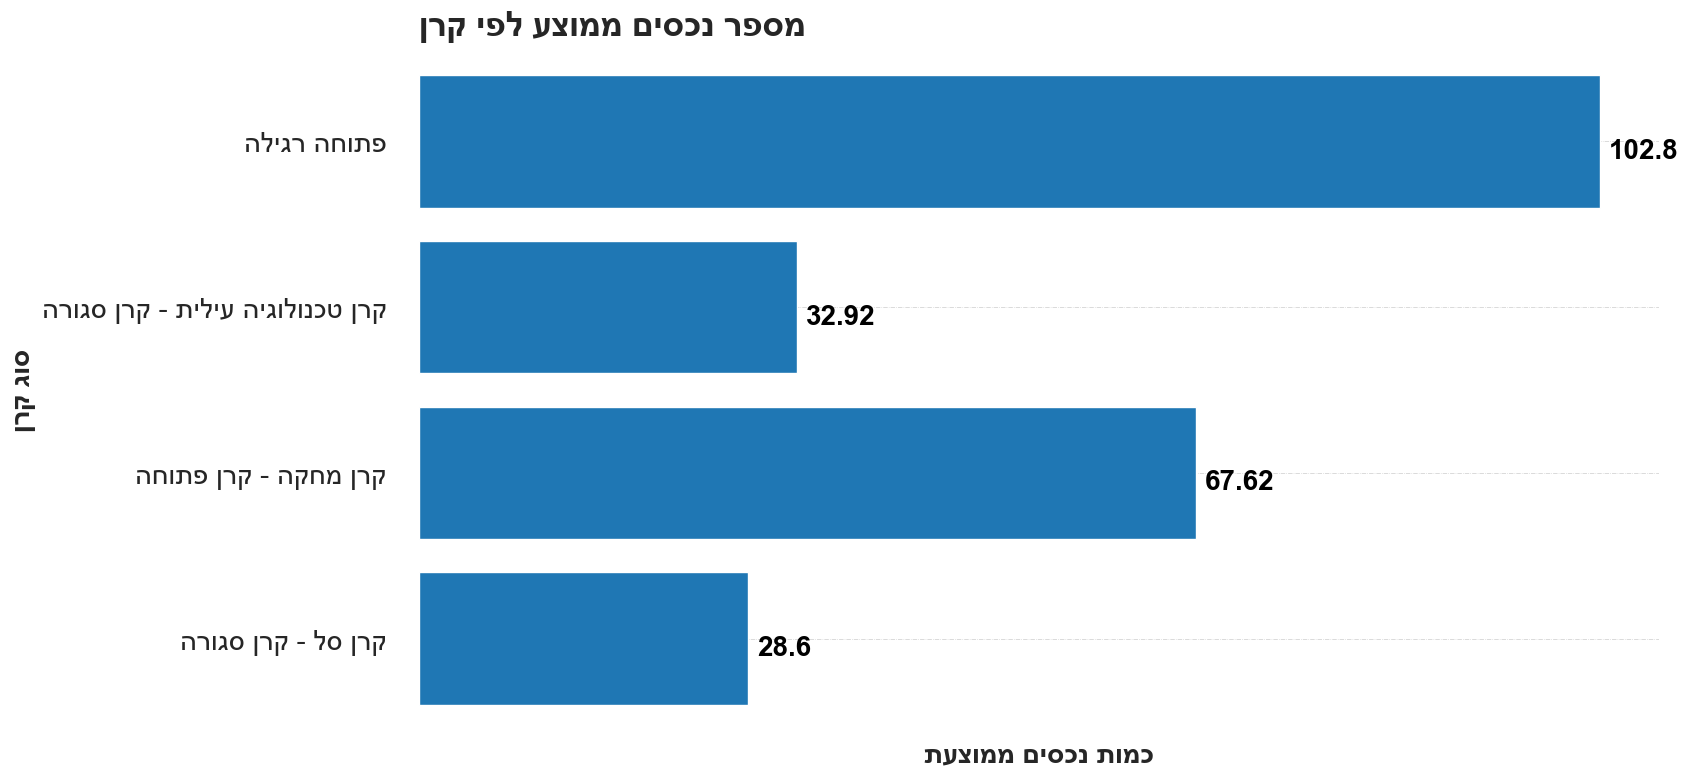

In [24]:
#Average assets amount per fund type calcualtion
average_fund_assets_pie=average_fund_assets.groupby(['Fund_Type'])['Average_assets'].mean().reset_index(name='Average_assets')

#sns.set(style="whitegrid")
plt.figure(figsize=(5,9))


average_fund_assets_pie['Fund_Type']=average_fund_assets_pie['Fund_Type'].apply(lambda x: x[::-1])

x = average_fund_assets_pie['Fund_Type']
y=average_fund_assets_pie['Average_assets']
average_fund_assets_pie
fig, ax = plt.subplots(figsize =(16, 9))
x = average_fund_assets_pie['Fund_Type']
y=average_fund_assets_pie['Average_assets']
ax.barh(x, y)

title="כמות ממוצעת של נכסים לפי סוג קרן"

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.tick_params(axis='both', which='major', labelsize=20)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 20)
ax.yaxis.set_tick_params(pad = 20)
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis() 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.8, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='black')
xlabel="כמות נכסים ממוצעת"
ylabel="סוג קרן"
title="מספר נכסים ממוצע לפי קרן"
xlabel,ylabel,title=xlabel[::-1],ylabel[::-1] ,title[::-1]
 
# Add Plot Title
ax.set_title(title,
             loc ='left',fontsize=25 ,fontweight ='bold')
plt.xticks([])


plt.xlabel(xlabel, fontsize=20,fontweight ='bold')
plt.ylabel(ylabel, fontsize=20 ,fontweight ='bold')

# Show Plot
plt.show()

# fund's value, fund's assets and fund's yield distributions at general level

### Average fund value distribution

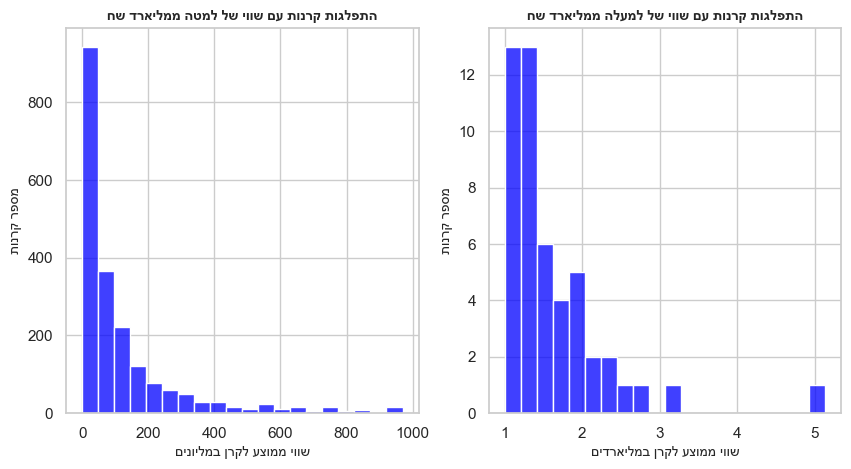

,Average_value_in_Millions
count,2077.00
mean,158.74
std,305.14
min,0.06
25%,19.54
50%,58.97
75%,153.44
max,5134.58


<Figure size 640x480 with 0 Axes>

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))


xhead="שווי ממוצע לקרן במליונים"
yhead= "מספר קרנות"
head="התפלגות קרנות עם שווי של למטה ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.xlabel(xhead)
plt.ylabel(yhead)

# We will divide the graphs for reasons of visibility
# first part -funds up to a Billion
plt.subplot(1, 2, 1)
for_hist0=df_03.loc[df_03['Average_value_in_Millions']<1000]
sns.histplot(for_hist0['Average_value_in_Millions'],bins=20,color='blue')



plt.xlabel(xhead,fontsize = 10)
plt.ylabel(yhead,fontsize = 10)
plt.title(head, fontweight ='bold',fontsize = 10)

# second part -funds with net value of a Billion and higher
plt.subplot(1, 2, 2)

# filter funds of higher than 1 Billion net worth, divide by 1000 and show numbers in Billions
for_hist1=df_03.loc[df_03['Average_value_in_Millions']>1000]
sns.histplot(for_hist1['Average_value_in_Millions']/1000,bins=20,color='blue')

# x y headers


xhead="שווי ממוצע לקרן במליארדים"
yhead= "מספר קרנות"
head="התפלגות קרנות עם שווי של למעלה ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.title(head, fontweight ='bold', fontsize = 10)

plt.xlabel(xhead,fontsize = 10)
plt.ylabel(yhead,fontsize = 10)

plt.title(head, fontweight ='bold',fontsize = 10)
plt.show()
plt.tight_layout()
df_03[['Average_value_in_Millions']].describe().round(2)

### Assets amount distribution

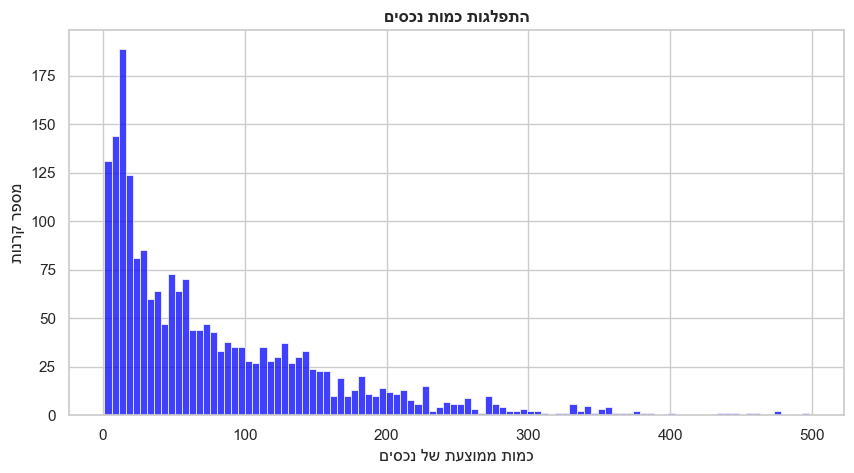

,Average_assets
count,2077.00
mean,79.17
std,78.65
min,1.00
25%,18.08
50%,54.17
75%,118.50
max,498.08


In [65]:
plt.figure(figsize=(10,5))
sns.histplot(df_03['Average_assets'],bins=100,color='blue')

xhead="כמות ממוצעת של נכסים"
yhead= "מספר קרנות"
head="התפלגות כמות נכסים"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


plt.xlabel(xhead)
plt.ylabel(yhead)


plt.title(head, fontweight ='bold')
plt.show()
df_03
df_03[['Average_assets']].describe().round(2)

### Yearly yield distribution

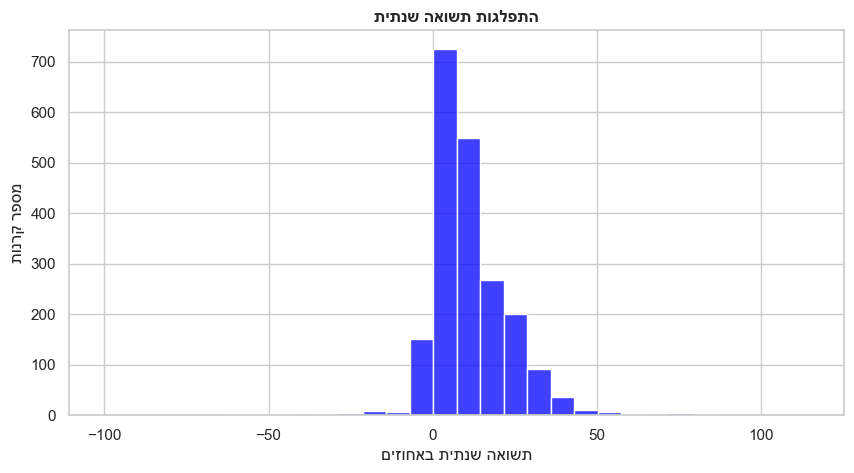

,Yearly_yield
count,2077.00
mean,11.15
std,12.74
min,-100.00
25%,4.25
50%,8.35
75%,17.16
max,114.75


In [66]:
xhead="תשואה שנתית באחוזים"
yhead= "מספר קרנות"
head="התפלגות תשואה שנתית"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.figure(figsize=(10,5))
sns.histplot(df_03['Yearly_yield'],bins=30,linestyle='solid',color='blue')

plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head, fontweight ='bold')
plt.show()
df_03[['Yearly_yield']].describe().round(2)

# Filter by fund type and show distributions

# Open funds

### Net value distribution in open funds

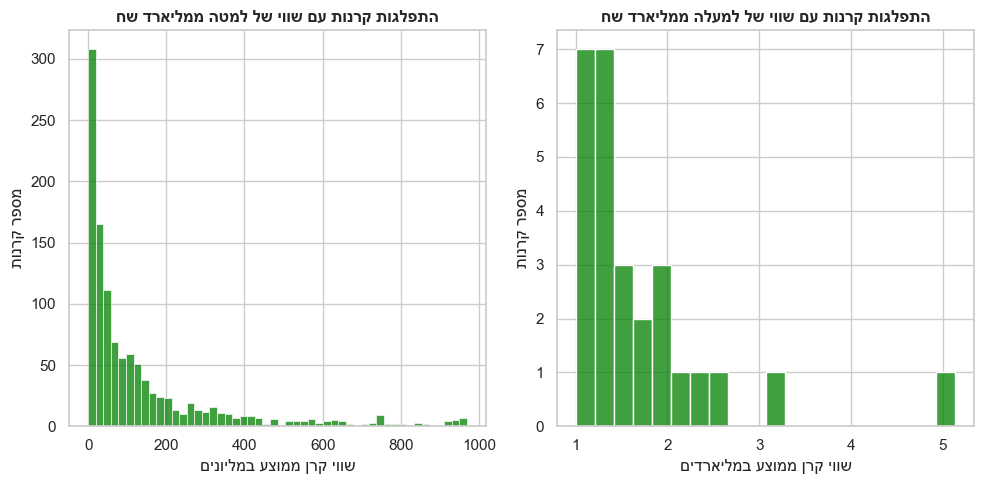

,Average_value_in_Millions
count,1181.000000
mean,172.550070
std,327.188614
min,0.063991
25%,17.916793
50%,60.117720
75%,177.955991
max,5134.575864


In [68]:
plt.figure(figsize=(10,5))


xhead="שווי קרן ממוצע במליונים"
yhead= "מספר קרנות"
head="התפלגות קרנות עם שווי של למטה ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]




#funds lower than 1 billion disturbtion

plt.subplot(1, 2, 1)
for_hist0=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']<1000)]
sns.histplot(for_hist0['Average_value_in_Millions'],bins=50,color='green')
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head, fontweight ='bold')
#plt.show()

#funds higher than 1 billion disturbtion
plt.subplot(1, 2, 2)
for_hist1=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']>1000)]

sns.histplot(for_hist1['Average_value_in_Millions']/1000,bins=20,color='green')

#headers 

xhead="שווי קרן ממוצע במליארדים"
yhead= "מספר קרנות"
head="התפלגות קרנות עם שווי של למעלה ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


#plot headers 
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head, fontweight ='bold')

plt.tight_layout()
plt.show()
df_03.loc[df_03['Fund_Type']=='פתוחה רגילה'][['Average_value_in_Millions']].describe()

### Average assets amount distirbubtion in open funds

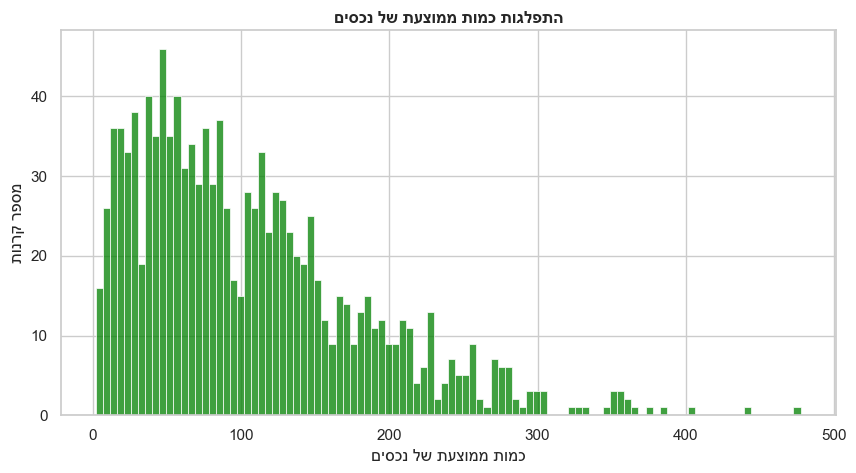

,Average_assets
count,1181.00
mean,105.05
std,76.25
min,2.00
25%,46.58
50%,87.08
75%,145.00
max,477.42


In [70]:
plt.figure(figsize=(10,5))


for_hist=df_03.loc[df_03['Fund_Type']=='פתוחה רגילה']

sns.histplot(for_hist['Average_assets'],bins=100,color='green')

xhead="כמות ממוצעת של נכסים"
yhead= "מספר קרנות"
head="התפלגות כמות ממוצעת של נכסים"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]




plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head, fontweight ='bold')
plt.show()
df_03
for_hist[['Average_assets']].describe().round(2)

### Yearly yield distubtion in open funds

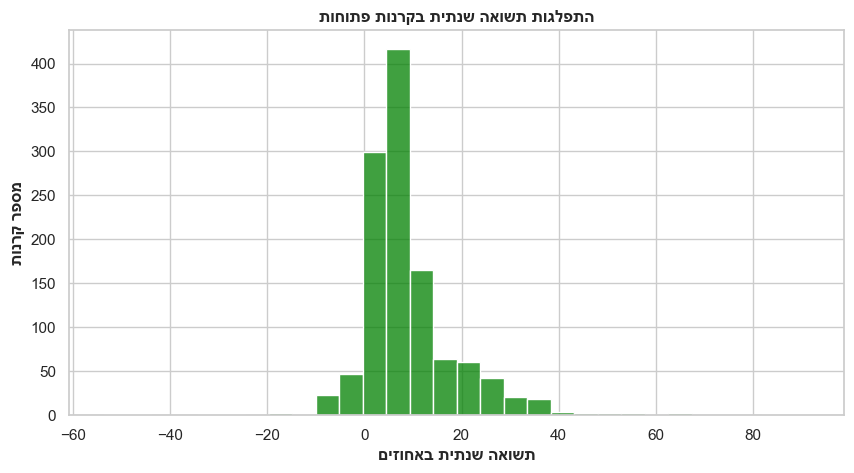

,Yearly_yield
count,1181.00
mean,8.85
std,10.38
min,-53.46
25%,3.38
50%,6.67
75%,11.31
max,91.49


In [72]:
xhead="תשואה שנתית באחוזים"
yhead= "מספר קרנות"
head="התפלגות תשואה שנתית בקרנות פתוחות"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


#filter yield of open funds
for_hist=df_03.loc[df_03['Fund_Type']=='פתוחה רגילה']

plt.figure(figsize=(10,5))
sns.histplot(for_hist['Yearly_yield'],bins=30,linestyle='solid',color='green')


plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')
plt.show()
for_hist[['Yearly_yield']].describe().round(2)

# Open index Fund

### Net value distribution in Open index Fund

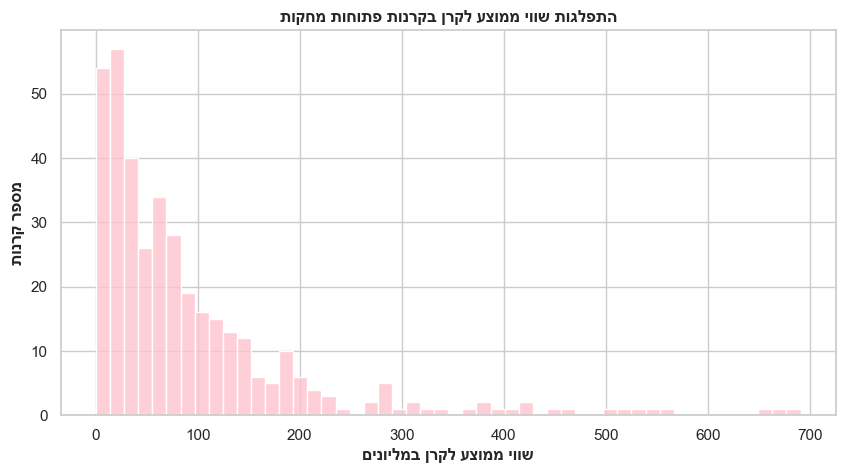

,Average_value_in_Millions
count,378.00
mean,93.96
std,112.15
min,0.21
25%,23.65
50%,58.15
75%,116.86
max,691.01


In [73]:
plt.figure(figsize=(10,5))

xhead="שווי ממוצע לקרן במליונים"
yhead= "מספר קרנות"
head="התפלגות שווי ממוצע לקרן בקרנות פתוחות מחקות"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

for_hist0=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
sns.histplot(for_hist0['Average_value_in_Millions'],bins=50,color='pink')
plt.show()
df_03.loc[df_03['Fund_Type']=='קרן מחקה - קרן פתוחה'][['Average_value_in_Millions']].describe().round(2)

## Average assets amount distribution in Open index Fund

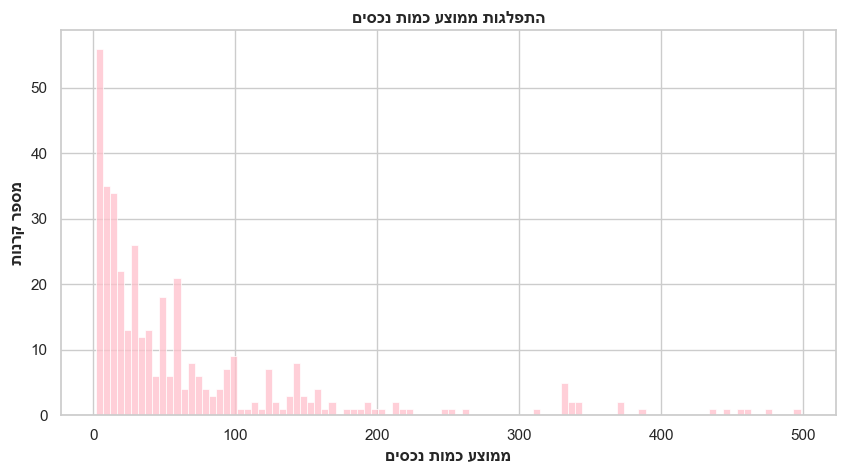

,Average_assets
count,378.00
mean,67.34
std,89.66
min,2.00
25%,12.38
50%,33.08
75%,78.56
max,498.08


In [74]:
plt.figure(figsize=(10,5))

for_hist=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
sns.histplot(for_hist['Average_assets'],bins=100,color='pink')

xhead="ממוצע כמות נכסים"
yhead= "מספר קרנות"
head="התפלגות ממוצע כמות נכסים"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

plt.show()
df_03
for_hist
for_hist[['Average_assets']].describe().round(2)

## Yearly yield  distribution in Open index Fund

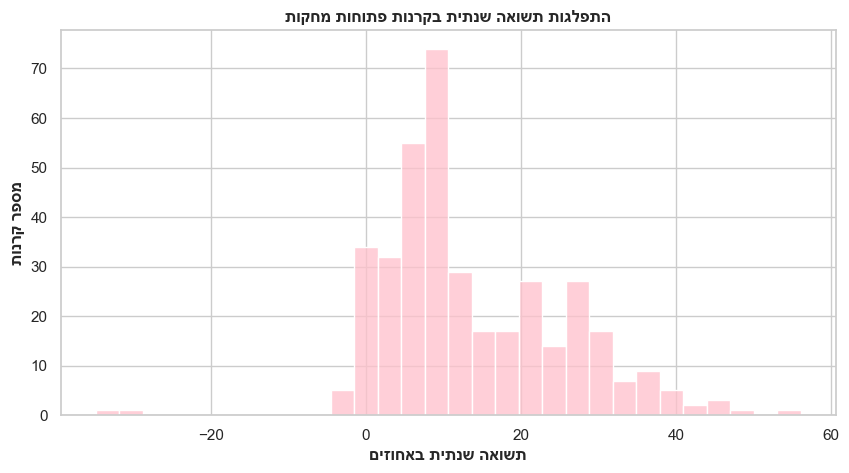

,Yearly_yield
count,378.00
mean,13.78
std,11.79
min,-34.84
25%,6.41
50%,9.75
75%,21.33
max,56.09


In [76]:
for_hist=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
plt.figure(figsize=(10,5))


sns.histplot(for_hist['Yearly_yield'],bins=30,linestyle='solid',color='pink')

xhead="תשואה שנתית באחוזים"
yhead= "מספר קרנות"
head="התפלגות תשואה שנתית בקרנות פתוחות מחקות"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]
plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')
plt.show()
for_hist[['Yearly_yield']].describe().round(2)

# Closed ETF Fund

## Net fund value distribution in closed ETF funds

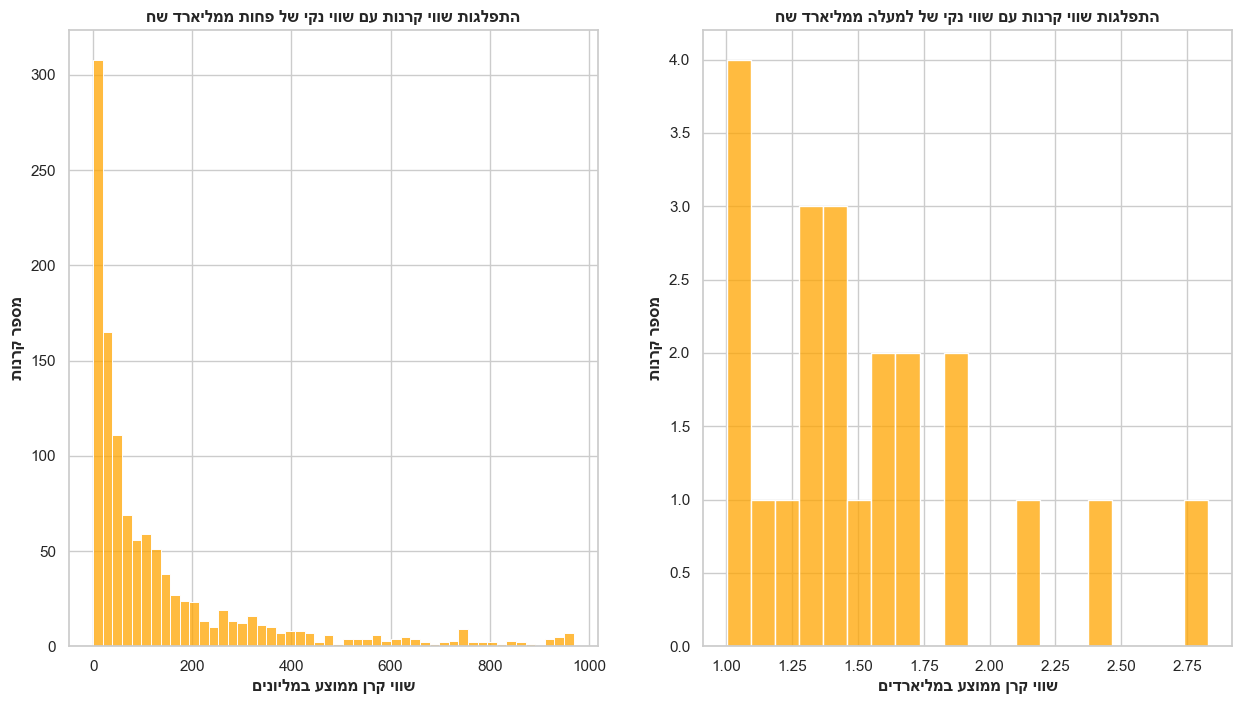

,Average_value_in_Millions
count,517.00
mean,174.05
std,341.66
min,0.16
25%,18.78
50%,58.03
75%,153.44
max,2828.56


In [77]:
plt.figure(figsize=(15,8))

xhead='Average fund value [Millions]'
yhead= 'Number of funds'
head='Distribution of funds with net value lower then 1 Billion'

xhead="שווי קרן ממוצע במליונים"
yhead= "מספר קרנות"
head="התפלגות שווי קרנות עם שווי נקי של פחות ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


plt.subplot(1, 2, 1)
for_hist0=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']<1000)]
sns.histplot(for_hist0['Average_value_in_Millions'],bins=50,color='orange')
plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

plt.subplot(1, 2, 2)

for_hist0=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')& (df_03['Average_value_in_Millions']>1000)]
sns.histplot(for_hist0['Average_value_in_Millions']/1000,bins=20,color='orange')

xhead='Average fund value [Billion]'
yhead= 'Number of funds'
head='Distribution of funds with net value of 1 Billion and higher'


xhead="שווי קרן ממוצע במליארדים"
yhead= "מספר קרנות"
head="התפלגות שווי קרנות עם שווי נקי של למעלה ממליארד שח"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

plt.show()
df_03.loc[df_03['Fund_Type']=='קרן סל - קרן סגורה'][['Average_value_in_Millions']].describe().round(2)

## Average assets amount distribution in closed ETF funds

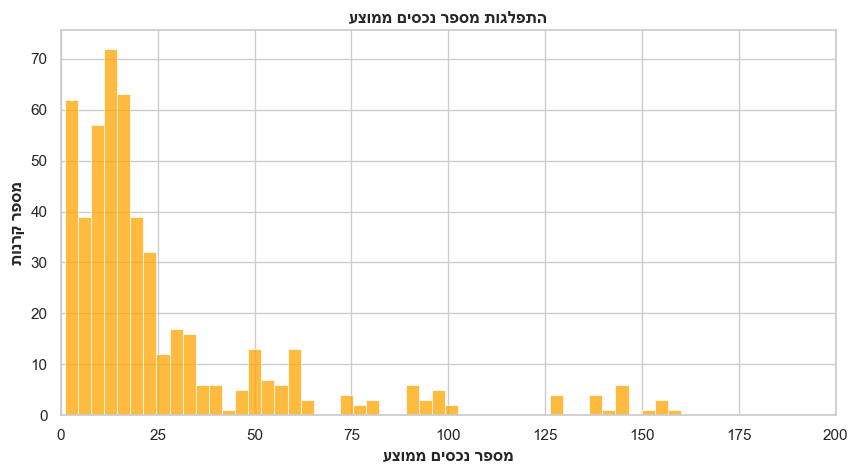

,Average_assets
count,517.00
mean,28.79
std,39.22
min,1.00
25%,10.00
50%,15.58
75%,30.42
max,339.42


In [78]:
plt.figure(figsize=(10,5))

for_hist=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')]
sns.histplot(for_hist['Average_assets'],bins=100,color='orange')

xhead="מספר נכסים ממוצע"
yhead= "מספר קרנות"
head="התפלגות מספר נכסים ממוצע"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]


plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')


plt.xlim(0,200)

plt.show()
for_hist[['Average_assets']].describe().round(2)

## Yearly yield  distribution in closed ETF funds

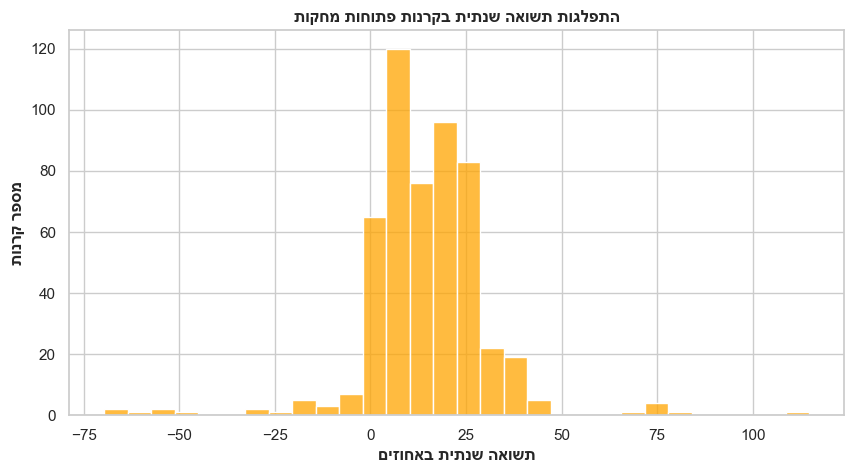

,Yearly_yield
count,517.00
mean,14.68
std,15.86
min,-69.59
25%,7.14
50%,14.69
75%,23.05
max,114.75


In [80]:
for_hist=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')]
plt.figure(figsize=(10,5))


sns.histplot(for_hist['Yearly_yield'],bins=30,linestyle='solid',color='orange')

xhead="תשואה שנתית באחוזים"
yhead= "מספר קרנות"
head="התפלגות תשואה שנתית בקרנות פתוחות מחקות"
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]



plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')
plt.show()
for_hist[['Yearly_yield']].describe().round(2)

# 

## Change in fund assets variable histogram

### Yearly change in fund assets variable histogram

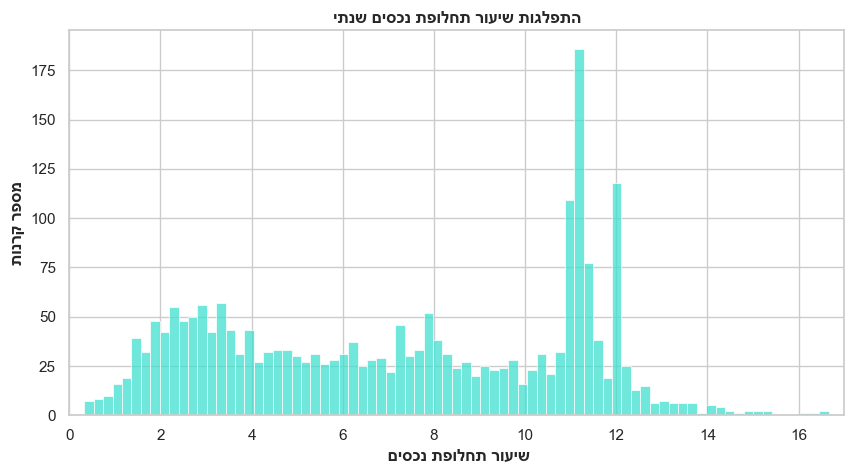

,Fund_Number,Rate1
count,2270.0,2270.0
mean,4009967.2,7.3
std,1782096.1,3.8
min,1142538.0,0.3
25%,1150578.5,3.6
50%,5114156.0,7.4
75%,5123714.0,11.1
max,5520044.0,21.0


In [83]:
# import the yearly rate data
rate1=pd.read_csv('rate1.csv',encoding='UTF-8') #Yearly change in fund assets

plt.figure(figsize=(10,5))

sns.histplot(rate1.Rate1,bins=100,color='turquoise')

xhead="YCFA"
yhead= 'Number of funds'
head='Yearly change in fund assets distribution'

head = 'התפלגות שיעור תחלופת נכסים שנתי'
xhead="שיעור תחלופת נכסים "
yhead= 'מספר קרנות'
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]



plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

plt.xlim(0, 17)


plt.show()

rate1.describe().round(1)

### Monthly change in fund assets variable histogram

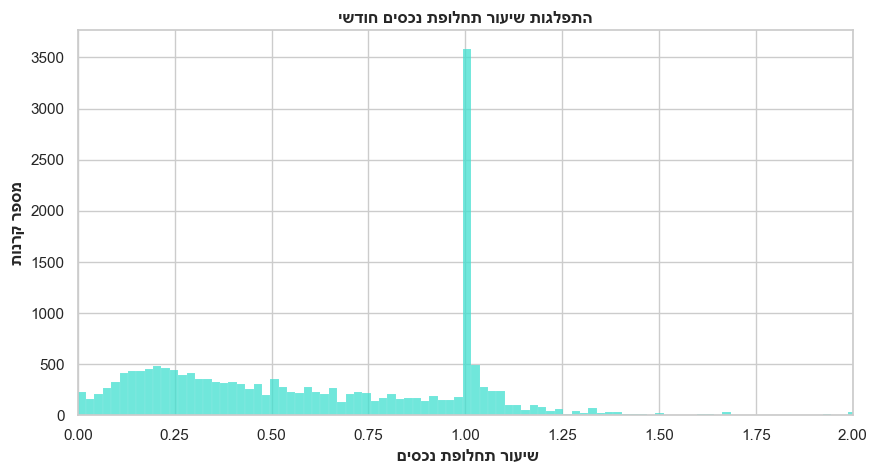

,Fund_Number,rate1
count,18360.0,18360.0
mean,4041642.9,0.6
std,1765181.2,0.4
min,1142538.0,0.0
25%,1150671.0,0.3
50%,5113498.0,0.6
75%,5122635.0,1.0
max,5520044.0,21.6


In [84]:
rate1_2monthly=pd.read_csv('rate1_2.csv',encoding='UTF-8')

plt.figure(figsize=(10,5))

sns.histplot(rate1_2monthly.rate1,bins=1000,color='turquoise')

xhead="MCFA"
yhead= 'Number of funds'
head='Monthly change in fund assets distribution'

head = 'התפלגות שיעור תחלופת נכסים חודשי'
xhead="שיעור תחלופת נכסים "
yhead= 'מספר קרנות'
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]



plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')


plt.xlim(0, 2)
plt.show()

rate1_2monthly[['Fund_Number','rate1']].describe().round(1)

 ##  Asset value change variable histogram

###  Yearly asset value change variable histogram

,Fund_Number,rate2
count,2270.0,2256.0
mean,4009967.2,0.1
std,1782096.1,0.4
min,1142538.0,0.0
25%,1150578.5,0.0
50%,5114156.0,0.1
75%,5123714.0,0.2
max,5520044.0,16.8


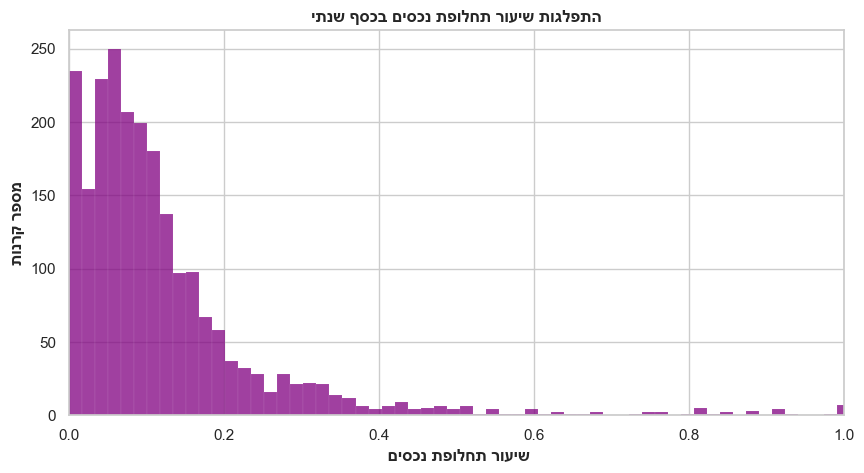

In [86]:
rate2=pd.read_csv('rate_2.csv',encoding='UTF-8')

plt.figure(figsize=(10,5))

sns.histplot(rate2.rate2,bins=1000,color='purple')

xhead="YVCF"
yhead= 'Number of funds'
head='Yearly asset value change distribution'


head = 'התפלגות שיעור תחלופת נכסים בכסף שנתי'
xhead="שיעור תחלופת נכסים "
yhead= 'מספר קרנות'
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')

plt.xlim(0, 1)
rate2.describe().round(1)

## Monthly  asset value change variable histogram

In [87]:
rate1_2monthly=pd.read_csv('rate1_2.csv',encoding='UTF-8')

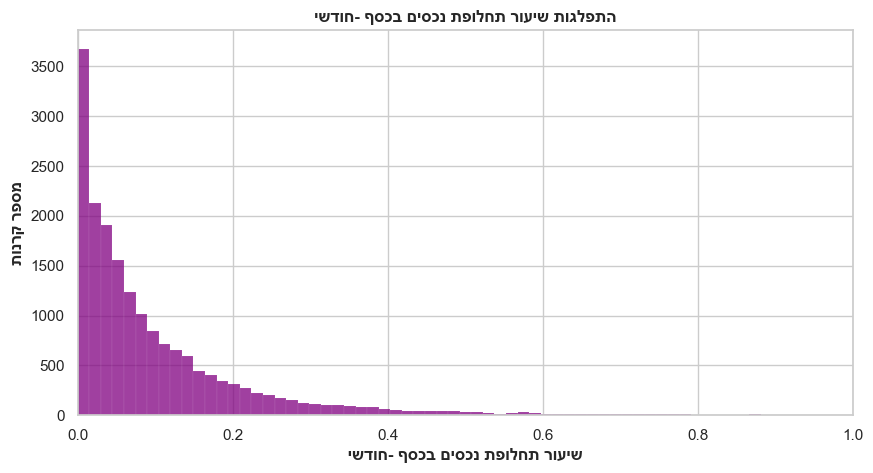

,Fund_Number,rate2
count,18360.0,18360.0
mean,4041642.9,0.1
std,1765181.2,0.3
min,1142538.0,0.0
25%,1150671.0,0.0
50%,5113498.0,0.1
75%,5122635.0,0.1
max,5520044.0,14.9


In [88]:
plt.figure(figsize=(10,5))


sns.histplot(rate1_2monthly.rate2,bins=1000,color='purple')

xhead="MVCF"
yhead= 'Number of funds'
head='Monthly  asset value change distribution'

head = 'התפלגות שיעור תחלופת נכסים בכסף -חודשי'
xhead=" שיעור תחלופת נכסים בכסף -חודשי "
yhead= 'מספר קרנות'
xhead,yhead,head=xhead[::-1],yhead[::-1] ,head[::-1]

plt.xlabel(xhead, fontweight ='bold')
plt.ylabel(yhead, fontweight ='bold')
plt.title(head, fontweight ='bold')


plt.xlim(0, 1)
plt.show()

rate1_2monthly[['Fund_Number','rate2']].describe().round(1)